### Import necessary libraries

In [1]:
import requests
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

### Input pre-processing

In [2]:
img = Image.open(f"./sample/sample.png").convert("L")
img = ImageOps.invert(img)
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr = img_arr.reshape(28, 28, 1)

### Get results from the deployed model

In [3]:
API_KEY = "qyrJtdFzG7YfxKOEng8P0KKNr7-rLFOU7IvWtqfZKGQN" 

token_response = requests.post('https://iam.cloud.ibm.com/identity/token', 
                               data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})

mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [], "values": [img_arr.tolist()]}]}

response_scoring = requests.post('https://eu-gb.ml.cloud.ibm.com/ml/v4/deployments/5f763653-3cbc-4dd9-82d2-abbb0621b021/predictions?version=2022-11-19', 
                                 json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})

### Display results

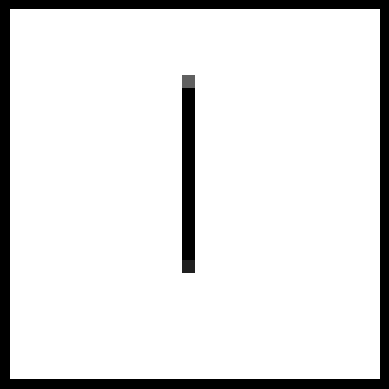

Result:  1


In [4]:
plt.imshow(plt.imread("./sample/sample.png"))
plt.axis('off')
plt.show()
print("Result: ", response_scoring.json()['predictions'][0]['values'][0][1])